In [27]:
# Importing Packages 
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import talib
import plotly.graph_objects as go
from datetime import datetime
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Downloading the data from yahoo finance
EURUSD_df = yf.download("EURUSD=X", start = '2006-9-14', end = '2021-8-25', group_by = "ticker")
USDJPY_df = yf.download(" USDJPY=X", start = '2006-9-14', end = '2021-8-25', group_by = "ticker")
GBPUSD_df = yf.download("GBPUSD=X", start = '2006-9-14', end = '2021-8-25')
USDCHF_df = yf.download("USDCHF=X", start = '2006-9-14', end = '2021-8-25')
USDJPY_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2006-09-14  117.489998  117.760002  117.320000  117.570000  117.570000       0
2006-09-15  117.570000  118.089996  117.370003  117.470001  117.470001       0
2006-09-18  117.730003  118.269997  117.680000  117.889999  117.889999       0
2006-09-19  117.879997  118.070000  116.989998  117.599998  117.599998       0
2006-09-20  117.599998  117.639999  116.970001  117.459999  117.459999       0

In [3]:
# Calling RSI indicator from pandas_ta for EURUSD_df
EURUSD_df['RSI'] = EURUSD_df.ta.rsi().dropna()

In [4]:
# Calling RSI indicator from pandas_ta for USDJPY_df
USDJPY_df['RSI'] = USDJPY_df.ta.rsi().dropna()
#USDJPY_df['STOCHk_14_3_3','STOCHd_14_3_3'] = USDJPY_df.ta.stoch()

In [5]:
# Calling RSI indicator from pandas_ta for GBPUSD_df
GBPUSD_df['RSI'] = GBPUSD_df.ta.rsi().dropna()

In [6]:
# Calling RSI indicator from pandas_ta for USDCHF_df
USDCHF_df['RSI'] = USDCHF_df.ta.rsi().dropna()

In [7]:
# Reversal patterns of the hammer and the shooting star for each currency
shooting_star_eurusd = talib.CDLSHOOTINGSTAR(EURUSD_df['Open'],EURUSD_df['High'],EURUSD_df['Low'] , EURUSD_df['Close'])
hammer_pattern_eurusd = talib.CDLHAMMER(EURUSD_df['Open'],EURUSD_df['High'],EURUSD_df['Low'] , EURUSD_df['Close'])

shooting_star_usdjpy = talib.CDLSHOOTINGSTAR(USDJPY_df['Open'],USDJPY_df['High'],USDJPY_df['Low'] , USDJPY_df['Close'])
hammer_pattern_usdjpy = talib.CDLHAMMER(USDJPY_df['Open'],USDJPY_df['High'],USDJPY_df['Low'] , USDJPY_df['Close'])

shooting_star_gbpusd = talib.CDLSHOOTINGSTAR(GBPUSD_df['Open'],GBPUSD_df['High'],GBPUSD_df['Low'] , GBPUSD_df['Close'])
hammer_pattern_gbpusd = talib.CDLHAMMER(GBPUSD_df['Open'],GBPUSD_df['High'],GBPUSD_df['Low'] , GBPUSD_df['Close'])

shooting_star_usdchf = talib.CDLSHOOTINGSTAR(USDCHF_df['Open'],USDCHF_df['High'],USDCHF_df['Low'] , USDCHF_df['Close'])
hammer_pattern_usdchf = talib.CDLHAMMER(USDCHF_df['Open'], USDCHF_df['High'],USDCHF_df['Low'] , USDCHF_df['Close'])

Identify the trading signals 

In [8]:
# Generate the trading signal 0, 1, or 2
# Where 2 is when RSI is greater than 70 and shooting star shows up, 1 is when RSI is lesser than 30 and 
#hammer shows up and 0 when the condition is not met 
conditions_eurusd = [(EURUSD_df['RSI'] >=  70) &  (shooting_star_eurusd  != 0), (EURUSD_df['RSI'] <=  30) &  (hammer_pattern_eurusd != 0)]
values = ['sell', 'buy']

EURUSD_df["Signal"] = np.select(conditions_eurusd, values)
print(EURUSD_df[EURUSD_df['Signal'] =='buy'])

                Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
2008-09-03  1.451800  1.453172  1.438870  1.448604   1.448604       0   
2010-02-05  1.374476  1.374608  1.358806  1.368008   1.368008       0   
2010-05-17  1.237226  1.241064  1.224605  1.239296   1.239296       0   
2012-05-30  1.247816  1.248595  1.239157  1.247816   1.247816       0   
2015-03-11  1.070939  1.071455  1.056140  1.070870   1.070870       0   

                  RSI Signal  
Date                          
2008-09-03  21.962197    buy  
2010-02-05  24.174746    buy  
2010-05-17  24.965234    buy  
2012-05-30  25.893842    buy  
2015-03-11  19.980131    buy  


In [9]:
conditions_usdjpy = [(USDJPY_df['RSI'] >=  70) &  (shooting_star_usdjpy  != 0), (USDJPY_df['RSI'] <=  30) &  (hammer_pattern_usdjpy != 0)]
values = ['sell', 'buy']

USDJPY_df["Signal"] = np.select(conditions_usdjpy, values)

In [10]:
conditions_gbpusd = [(GBPUSD_df['RSI'] >=  70) &  (shooting_star_gbpusd  != 0), (GBPUSD_df['RSI'] <=  30) &  (hammer_pattern_gbpusd != 0)]
values = ['sell', 'buy']

GBPUSD_df["Signal"] = np.select(conditions_gbpusd, values)

In [11]:
conditions_usdchf = [(USDCHF_df['RSI'] >=  70) &  (shooting_star_usdchf != 0), (USDCHF_df['RSI'] <=  30) &  (hammer_pattern_usdchf != 0)]
values = ['sell', 'buy']

USDCHF_df["Signal"] = np.select(conditions_usdchf, values)

In [12]:
# Reset the index in order of creating a candlestick bar chart
EURUSD_reset_index = EURUSD_df.reset_index()
EURUSD_reset_index.head() 

USDJPY_reset_index = USDJPY_df.reset_index()
USDJPY_reset_index.head() 

GBPUSD_reset_index = GBPUSD_df.reset_index()
GBPUSD_reset_index.head() 

USDCHF_reset_index = USDCHF_df.reset_index()
USDCHF_reset_index.head() 


Date     Open     High     Low   Close  Adj Close  Volume  RSI Signal
0 2006-09-14  1.24970  1.25280  1.2439  1.2526     1.2526       0  NaN      0
1 2006-09-15  1.25240  1.26165  1.2514  1.2578     1.2578       0  NaN      0
2 2006-09-18  1.25700  1.25780  1.2499  1.2502     1.2502       0  NaN      0
3 2006-09-19  1.24990  1.25710  1.2482  1.2515     1.2515       0  NaN      0
4 2006-09-20  1.25175  1.25325  1.2462  1.2509     1.2509       0  NaN      0

# Plotting Candlestick bar chart for every Major Pairs of currencies

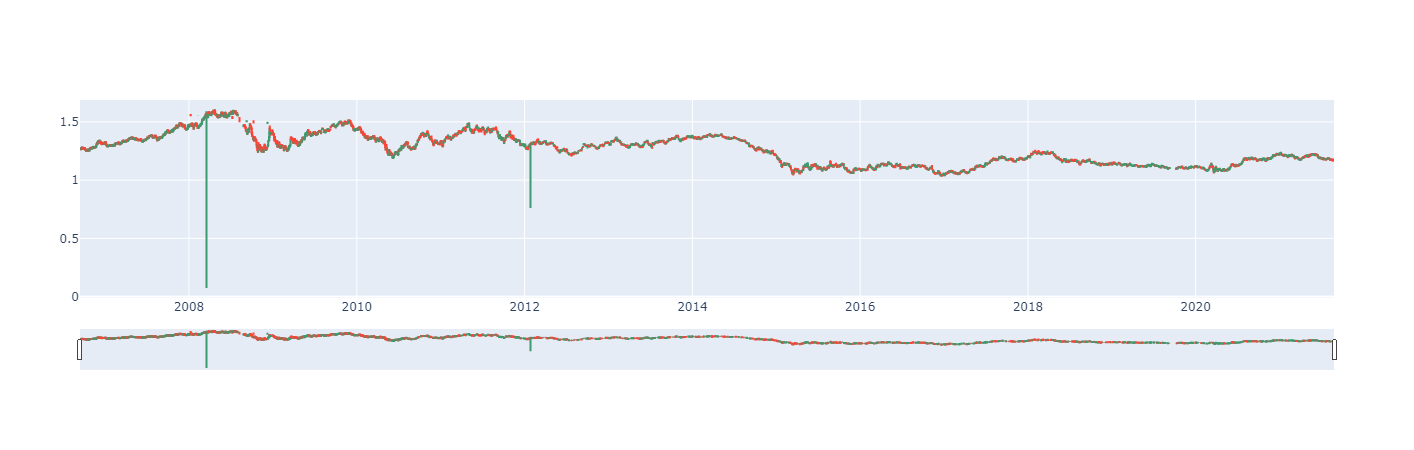

In [13]:
# Plotting Candlestick bar chart for EURUSD
EURUSD_plot = go.Figure(data=[go.Candlestick(x=EURUSD_reset_index ['Date'],
                                             open=EURUSD_df['Open'], 
                                             high=EURUSD_df['High'], 
                                             low=EURUSD_df['Low'], 
                                             close=EURUSD_df['Close'])])

EURUSD_plot.show()

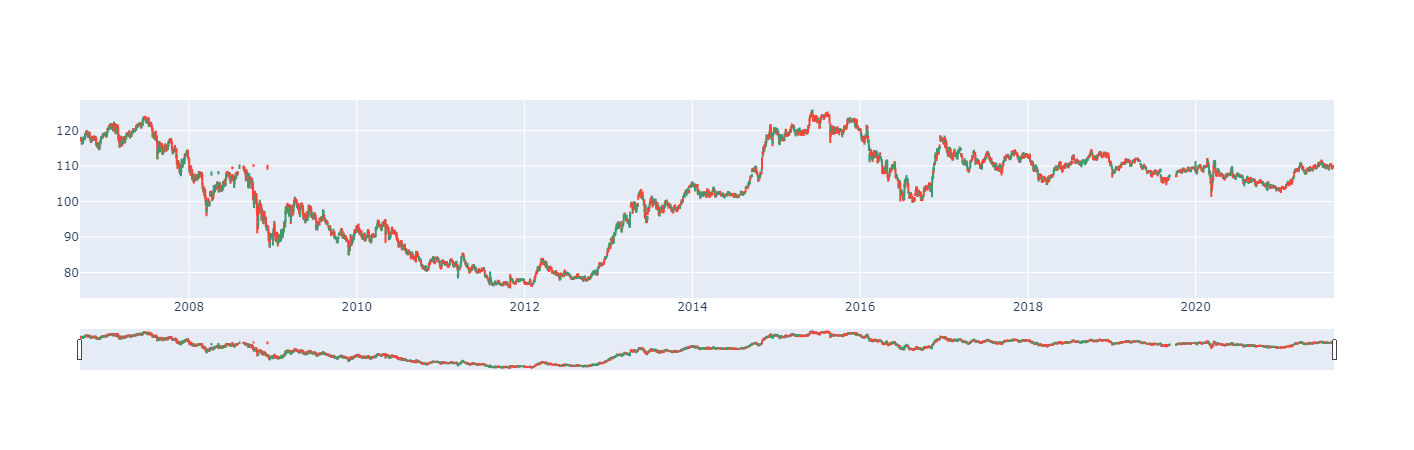

In [14]:
# Plotting Candlestick bar chart for USDJPY
USDJPY_plot = go.Figure(data=[go.Candlestick(x=USDJPY_reset_index ['Date'],
                                             open=USDJPY_df['Open'], 
                                             high=USDJPY_df['High'], 
                                             low=USDJPY_df['Low'], 
                                             close=USDJPY_df['Close'])])

USDJPY_plot.show()

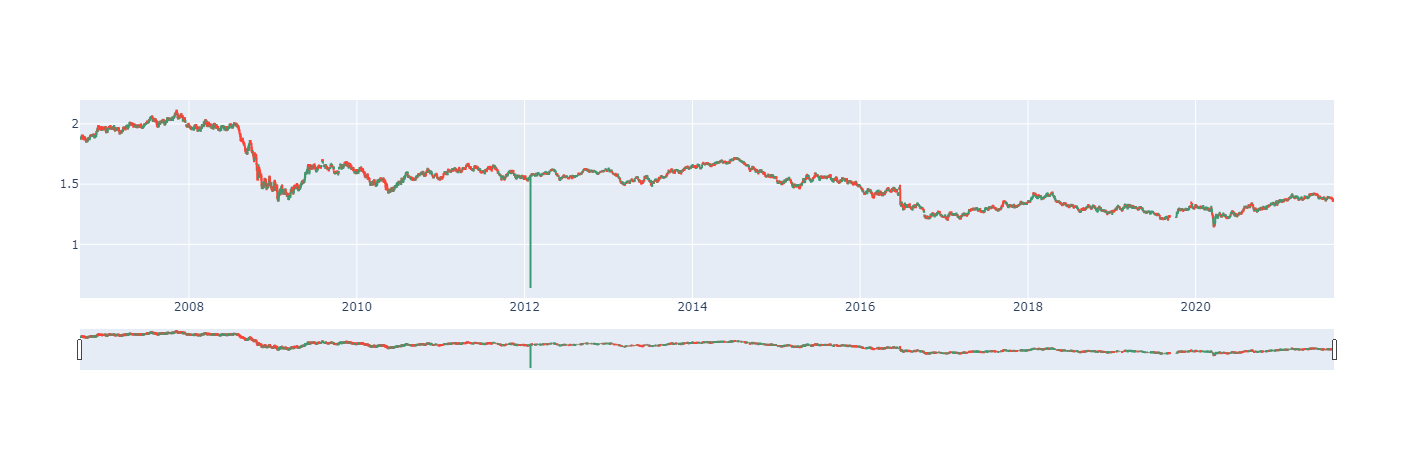

In [15]:
# Plotting Candlestick bar chart for EURUSD
GBPUSD_plot = go.Figure(data=[go.Candlestick(x=GBPUSD_reset_index ['Date'],
                                             open=GBPUSD_df['Open'], 
                                             high=GBPUSD_df['High'], 
                                             low=GBPUSD_df['Low'], 
                                             close=GBPUSD_df['Close'])])

GBPUSD_plot.show()

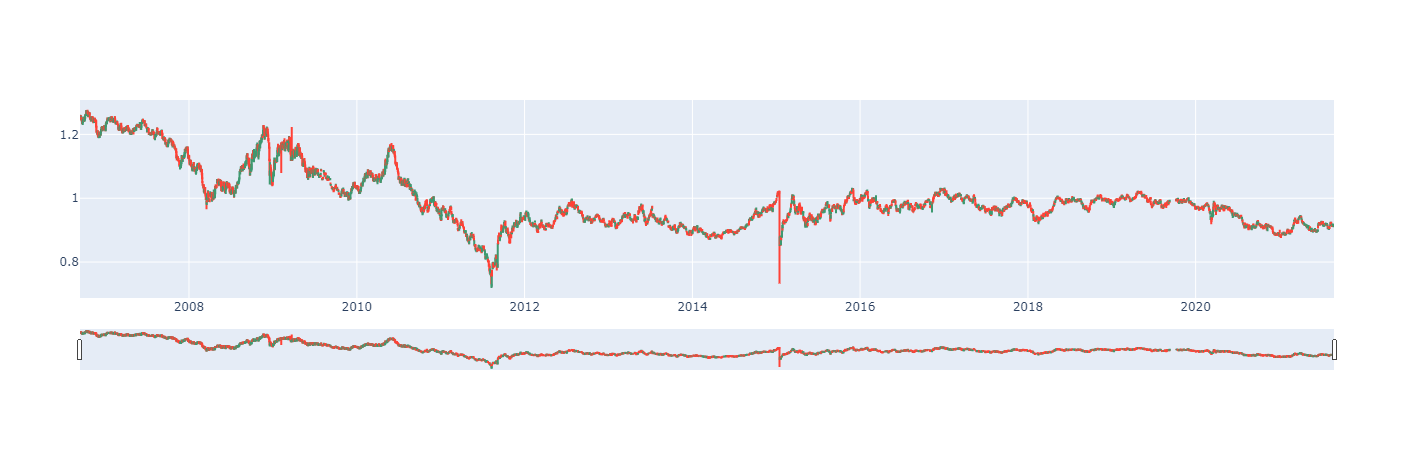

In [16]:
# Plotting Candlestick bar chart for EURUSD
USDCHF_plot = go.Figure(data=[go.Candlestick(x=USDCHF_reset_index ['Date'],
                                             open=USDCHF_df['Open'], 
                                             high=USDCHF_df['High'], 
                                             low=USDCHF_df['Low'], 
                                             close=USDCHF_df['Close'])])

USDCHF_plot.show()

In [17]:
# Adding currency colums
#Modyfy names for a colunms for indexes to be able to merge dataframes
#Display resulting dataframes
EURUSD_slice_df= EURUSD_df.loc[: , ['Close']].dropna()
EURUSD_slice_df['Currency'] = "EURUSD"
EURUSD_slice_df.tail()


GBPUSD_slice_df= GBPUSD_df.loc[: , ['Close']].dropna()
GBPUSD_slice_df['Currency'] = "GBPUSD"
GBPUSD_slice_df.tail()

USDJPY_slice_df= USDJPY_df.loc[: , ['Close']].dropna()
USDJPY_slice_df['Currency'] = "USDJPY"
USDJPY_slice_df.tail()

USDCHF_slice_df= USDCHF_df.loc[: , ['Close']].dropna()
USDCHF_slice_df['Currency'] = "USDCHF"
USDCHF_slice_df.tail()

Close Currency
Date                        
2021-08-19  0.91756   USDCHF
2021-08-20  0.91892   USDCHF
2021-08-23  0.91712   USDCHF
2021-08-24  0.91230   USDCHF
2021-08-25  0.91310   USDCHF

In [18]:
# Create a list holdinfall of the assets
closing_prices = [EURUSD_slice_df, USDJPY_slice_df, GBPUSD_slice_df, USDCHF_slice_df]

In [19]:
# Convert the list called cloclosing_prices into a dataframe using the function .concat()
closing_prices_concat_df = pd.concat(closing_prices)
closing_prices_concat_df.head()

Close Currency
Date                         
2006-09-14  1.272297   EURUSD
2006-09-15  1.265102   EURUSD
2006-09-18  1.270696   EURUSD
2006-09-19  1.267700   EURUSD
2006-09-20  1.268794   EURUSD

In [20]:
# # Use Pandas `pivot` function to unify columns
closing_prices_df = closing_prices_concat_df.pivot(columns="Currency")
closing_prices_df.head().dropna()

Close                              
Currency      EURUSD    GBPUSD  USDCHF      USDJPY
Date                                              
2006-09-14  1.272297  1.885903  1.2526  117.570000
2006-09-15  1.265102  1.877899  1.2578  117.470001
2006-09-18  1.270696  1.881184  1.2502  117.889999
2006-09-19  1.267700  1.881786  1.2515  117.599998
2006-09-20  1.268794  1.887291  1.2509  117.459999

Using dropna and pct_change function to find daily return on the portfolio

In [21]:
daily_return_of_the_currencies = closing_prices_df.pct_change().dropna()
daily_return_of_the_currencies.tail()

Close                              
Currency      EURUSD    GBPUSD    USDCHF    USDJPY
Date                                              
2021-08-19 -0.000550  0.000247  0.003072  0.002784
2021-08-20 -0.002282 -0.008219  0.001482 -0.000674
2021-08-23  0.001794 -0.000409 -0.001959  0.000656
2021-08-24  0.004017  0.007302 -0.005256 -0.001475
2021-08-25  0.000729  0.000055  0.000877  0.000474

Visualizeing daily return for each currency


In [35]:

# visualise daily returns `return_portfolio_df` dataframe with plot function overlaying all assets
#daily_return_of_the_currencies['Close'].hvplot(title = "Daily return", width = 1000, height=500)
daily_return_of_the_currencies['Close'].hvplot(kind = "box")

:BoxWhisker   [Variable]   (value)

The daily return measures the percentage of the increase or decrease of the investment between the closing price on the current day and that on the previous day. As we can see on the  plot USDJPY and EURUSD have the highest value which means they decrease increse or decrease the most. On the other hand GBPUSD has the lowest value for the daily return, so it's the one that has the increase or decrease the lowest.

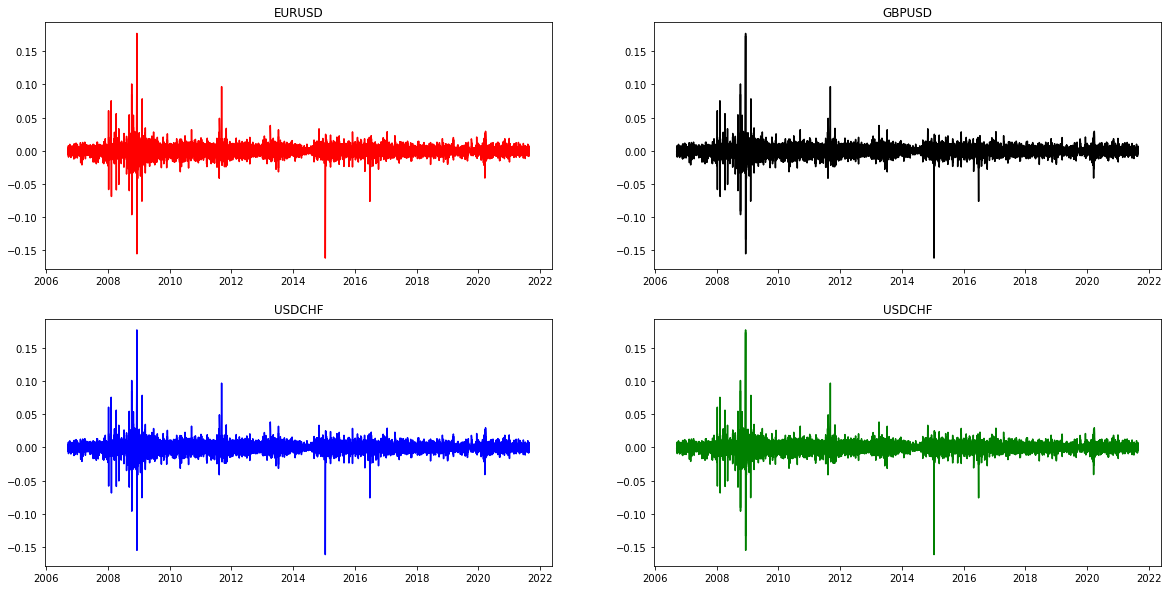

In [32]:

#visualize the data for cryptocurrency on the separate graphs side by side

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].plot(daily_return_of_the_currencies['Close'], c='r')
axs[0,0].set_title('EURUSD')
axs[0,1].plot(daily_return_of_the_currencies['Close'],c='k')
axs[0,1].set_title("GBPUSD")
axs[1,0].plot(daily_return_of_the_currencies['Close'],c='b')
axs[1,0].set_title ('USDCHF')
axs[1,1].plot(daily_return_of_the_currencies['Close'], c='g')
axs[1,1].set_title('USDCHF')
plt.show()

In [33]:
closing_prices_df.describe(include = "all")

Close                                       
Currency       EURUSD       GBPUSD       USDCHF       USDJPY
count     3853.000000  3865.000000  3866.000000  3853.000000
mean         1.260920     1.533151     0.995332   102.910967
std          0.128276     0.218888     0.094049    12.917497
min          1.039047     1.149439     0.722800    75.739998
25%          1.136842     1.332232     0.931400    93.559998
50%          1.266592     1.536996     0.975900   106.260002
75%          1.357368     1.624220     1.021525   111.752998
max          1.598798     2.108192     1.273400   125.628998

By inspecting these the four values for the standard deviation, we can observe that USDJPY has the largest number, or standard deviation. This means that of the four currency pairs, USDJPY individual returns deviate the most from its average return. That is, USDJPY is the most volatile currency and therefore the most risky. By contrast, USDCHF  has the smallest standard deviation, which indicates that it’s the least risky.

In [24]:
# Calculating the Correlation
correlation_currencies = daily_return_of_the_currencies.corr()
correlation_currencies


Close                              
Currency          EURUSD    GBPUSD    USDCHF    USDJPY
      Currency                                        
Close EURUSD    1.000000  0.466864 -0.505534  0.160835
      GBPUSD    0.466864  1.000000 -0.378763 -0.025725
      USDCHF   -0.505534 -0.378763  1.000000  0.267459
      USDJPY    0.160835 -0.025725  0.267459  1.000000

<AxesSubplot:xlabel='None-Currency', ylabel='None-Currency'>

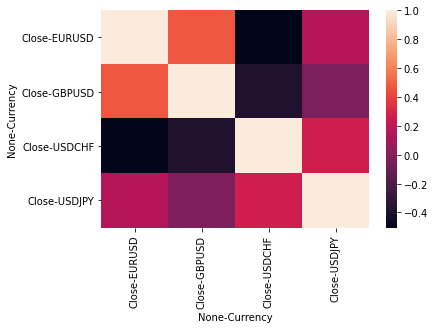

In [25]:
# Plotting the correlation calculation
sns.heatmap(correlation_currencies)